<a href="https://colab.research.google.com/github/Zulfatinnafisah/Kumpulan-Tugas-Kampus-Merdeka/blob/main/Zulfatin_Nafisah_Sertifikasi_Studi_Inpendent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Permasalahan Bisnis**
Sumanto seorang kredit analis sebuah Bank ABC sedang memiliki masalah karena banyaknya nasabah yang mengalami kredit macet. Untuk mengantisipasi masalah tersebut, dia mencoba melakukan analisis terhadap data nasabah dan status pembayaran cicilan kreditnya agar dapat memprediksi profile debitur (penghutang) dari aspek lancar atau macet kreditnya.

###**Tujuan Bisnis**

Untuk memprediksi calon nasabah apakah dapat membayar kredit lancar atau macet berdasarkan data history tahun lalu.

###**Tujuan Teknis Data Science**

Membuat model klasifikasi menggunakan decission tree dan satu model pilihan lainnya untuk memprediksi apakah seorang calon debitur dapat lancar membayar cicilan kredit atau tidak.

Evaluasi model menggunakan: confusion matrix, accuracy, precision, recall, dan F-1 score.

Ukuran keberhasilan pengembangan model klasifikasi: nilai accuracy harus diatas 80%

In [42]:
#import library numpy dan pandas
import numpy as np
import pandas as pd

In [43]:
#install library pycaret
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
#install library numba
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
#install library shap
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
from pycaret.classification import *

In [47]:
#membuat file excel menjadi bentuk data
data = pd.read_excel('/content/creditapproval-data.xls')
data

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,x1,P,40,345000.0,1,345000.00,301,6000,1,874,875,345000.0,345000.00,0.0,MACET
1,x2,L,31,350000.0,7,55716.00,301,6000,1,874,875,390000.0,111428.00,0.0,MACET
2,x5,P,34,3055499.0,8,381937.41,301,6000,1,874,875,3055499.0,1527749.48,0.0,MACET
3,x8,L,27,4435001.0,8,671098.00,301,6000,1,874,875,4435001.0,0.00,0.0,LANCAR
4,x10,P,49,1443750.0,15,107800.00,301,6000,1,874,875,1617000.0,1078000.00,0.0,MACET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,x762,L,38,1000000.0,16,70000.00,301,6000,2,874,0,812500.0,812500.00,97500.0,MACET
717,x763,P,36,1000000.0,12,90833.37,301,6000,2,874,0,429000.0,429000.00,45000.0,MACET
718,x764,L,28,2000000.0,10,260000.00,301,6000,2,874,0,600000.0,600000.00,180000.0,MACET
719,x765,P,31,1312500.0,7,198750.00,301,6000,2,874,0,1312500.0,1312500.00,78750.0,MACET


In [48]:
#melihat informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nama_nasabah            721 non-null    object 
 1   jenis_kelamin           721 non-null    object 
 2   umur                    721 non-null    int64  
 3   jml_pinjaman            721 non-null    float64
 4   jkw                     721 non-null    int64  
 5   jml_angsuran_per_bulan  721 non-null    float64
 6   jenis_pinjaman          721 non-null    int64  
 7   bi_sektor_ekonomi       721 non-null    int64  
 8   col                     721 non-null    int64  
 9   bi_golongan_debitur     721 non-null    int64  
 10  bi_gol_penjamin         721 non-null    int64  
 11  saldo_nominatif         721 non-null    float64
 12  tunggakan_pokok         721 non-null    float64
 13  tunggakan_bunga         721 non-null    float64
 14  status kredit           721 non-null    ob

In [49]:
#describe dataset
data.describe()

,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga
count,721.000000,7.210000e+02,721.000000,7.210000e+02,721.000000,721.000000,721.000000,721.000000,721.000000,7.210000e+02,7.210000e+02,7.210000e+02
mean,38.884882,2.180303e+06,19.219140,2.252810e+05,301.201110,6013.841886,1.217753,873.966713,266.090153,1.614740e+06,5.666357e+05,5.679598e+04
std,8.514159,4.088506e+06,32.892404,4.876708e+05,0.831531,222.679572,0.413005,1.505177,401.902934,3.619066e+06,1.175586e+06,2.302392e+05
min,19.000000,8.333333e+04,1.000000,5.000000e+03,301.000000,6000.000000,1.000000,834.000000,0.000000,3.075000e+04,0.000000e+00,0.000000e+00
25%,33.000000,8.750000e+05,8.000000,7.000000e+04,301.000000,6000.000000,1.000000,874.000000,0.000000,5.358350e+05,1.000000e+05,0.000000e+00
50%,38.000000,1.500000e+06,12.000000,1.050000e+05,301.000000,6000.000000,1.000000,874.000000,0.000000,9.625000e+05,3.437500e+05,0.000000e+00
75%,44.000000,2.000000e+06,20.000000,2.360000e+05,301.000000,6000.000000,1.000000,874.000000,875.000000,1.625000e+06,7.490000e+05,5.833332e+04
max,80.000000,8.000000e+07,679.000000,1.035000e+07,305.000000,9990.000000,2.000000,876.000000,875.000000,8.000000e+07,2.666667e+07,5.400000e+06


In [50]:
#membuat pemisahan data dengan variabel x dan y
x = data.loc[:, data.columns !='status kredit'] 
y = data.loc[:, data.columns =='status kredit']

In [51]:
x

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga
0,x1,P,40,345000.0,1,345000.00,301,6000,1,874,875,345000.0,345000.00,0.0
1,x2,L,31,350000.0,7,55716.00,301,6000,1,874,875,390000.0,111428.00,0.0
2,x5,P,34,3055499.0,8,381937.41,301,6000,1,874,875,3055499.0,1527749.48,0.0
3,x8,L,27,4435001.0,8,671098.00,301,6000,1,874,875,4435001.0,0.00,0.0
4,x10,P,49,1443750.0,15,107800.00,301,6000,1,874,875,1617000.0,1078000.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,x762,L,38,1000000.0,16,70000.00,301,6000,2,874,0,812500.0,812500.00,97500.0
717,x763,P,36,1000000.0,12,90833.37,301,6000,2,874,0,429000.0,429000.00,45000.0
718,x764,L,28,2000000.0,10,260000.00,301,6000,2,874,0,600000.0,600000.00,180000.0
719,x765,P,31,1312500.0,7,198750.00,301,6000,2,874,0,1312500.0,1312500.00,78750.0


In [52]:
y

,status kredit
0,MACET
1,MACET
2,MACET
3,LANCAR
4,MACET
...,...
716,MACET
717,MACET
718,MACET
719,MACET


In [53]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=0.2, random_state=0)
columns = x_train.columns 

In [54]:
#implementasi package pycaret
clf1 = setup (data = data,
             target = 'status kredit',
             numeric_imputation = 'mean',
             numeric_features =['umur','jml_pinjaman', 'jkw', 'jml_angsuran_per_bulan', 'saldo_nominatif','tunggakan_pokok','tunggakan_bunga'],
             categorical_features =['jenis_kelamin','jenis_pinjaman','bi_sektor_ekonomi','bi_golongan_debitur','bi_gol_penjamin'],
             ignore_features = ['nama_nasabah','col'],
             silent = True
             )

,Description,Value
0,session_id,5038
1,Target,status kredit
2,Target Type,Binary
3,Label Encoded,"LANCAR: 0, MACET: 1"
4,Original Data,"(721, 15)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['jenis_kelamin',
                                                            'jenis_pinjaman',
                                                            'bi_sektor_ekonomi',
                                                            'bi_golongan_debitur',
                                                            'bi_gol_penjamin'],
                                      display_types=False,
                                      features_todrop=['nama_nasabah', 'col'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['umur',
                                                          'jml_pinjaman', 'jkw',
                                  

In [55]:
#Membuat model
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9702,0.9855,0.9861,0.9731,0.9793,0.9261,0.9281,0.104
lightgbm,Light Gradient Boosting Machine,0.9624,0.9903,0.9778,0.9706,0.9737,0.9074,0.9100,0.122
gbc,Gradient Boosting Classifier,0.9525,0.9896,0.9611,0.9732,0.9664,0.8846,0.8889,0.125
rf,Random Forest Classifier,0.9485,0.9854,0.9778,0.9522,0.9645,0.8709,0.8742,0.218
et,Extra Trees Classifier,0.9327,0.9795,0.9611,0.9461,0.9531,0.8335,0.8363,0.181
dt,Decision Tree Classifier,0.9287,0.9138,0.9472,0.9535,0.9496,0.8261,0.8298,0.014
lr,Logistic Regression,0.9067,0.9565,0.9611,0.9155,0.9369,0.7572,0.7672,0.319
knn,K Neighbors Classifier,0.8969,0.9493,0.9167,0.9400,0.9269,0.7511,0.7570,0.022
svm,SVM - Linear Kernel,0.8852,0.0000,0.9444,0.9086,0.9229,0.6919,0.7052,0.013
lda,Linear Discriminant Analysis,0.8372,0.9198,0.9556,0.8404,0.8936,0.5507,0.5780,0.014


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=5038)
INFO:logs:compare_models() succesfully completed......................................


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=5038)

In [56]:
decision_tree_model = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8627,0.8639,0.8611,0.9394,0.8986,0.6877,0.6939
1,0.9608,0.9722,0.9444,1.0000,0.9714,0.9091,0.9129
2,0.9020,0.9111,0.8889,0.9697,0.9275,0.7769,0.7840
3,0.9412,0.9389,0.9444,0.9714,0.9577,0.8610,0.8620
4,0.9200,0.9008,0.9444,0.9444,0.9444,0.8016,0.8016
5,0.9600,0.9504,0.9722,0.9722,0.9722,0.9008,0.9008
6,0.9600,0.9286,1.0000,0.9474,0.9730,0.8963,0.9011
7,0.9600,0.9504,0.9722,0.9722,0.9722,0.9008,0.9008
8,0.9200,0.8790,0.9722,0.9211,0.9459,0.7925,0.7968


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5038, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [57]:
#mengevaluasi hasil model decision tree
evaluate_model(decision_tree_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5038, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5038, splitter='best'), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


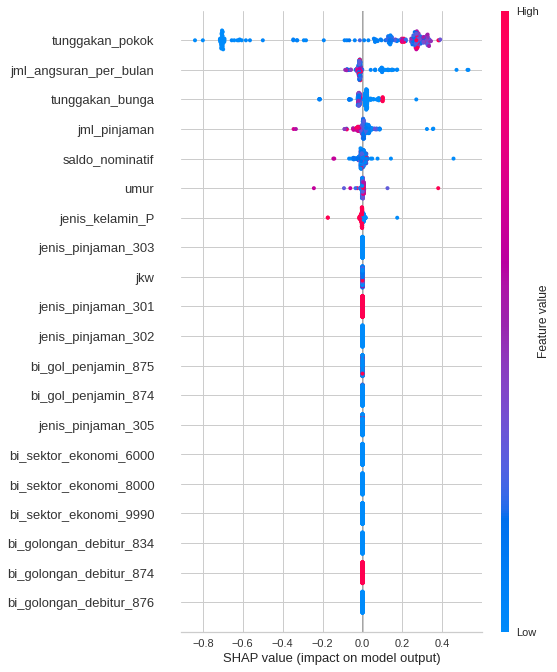

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [58]:
interpret_model(decision_tree_model)
#total loan :semakin kecil total loan semakin macet
#age : age semakin muda semakin lancar

In [59]:
random_forest_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9020,0.9537,0.9444,0.9189,0.9315,0.7592,0.7601
1,0.9608,0.9981,0.9444,1.0000,0.9714,0.9091,0.9129
2,0.9412,0.9944,0.9722,0.9459,0.9589,0.8555,0.8565
3,0.9216,0.9824,0.9722,0.9211,0.9459,0.8035,0.8074
4,0.9800,0.9940,1.0000,0.9730,0.9863,0.9493,0.9505
5,0.9800,0.9851,1.0000,0.9730,0.9863,0.9493,0.9505
6,0.9800,0.9861,1.0000,0.9730,0.9863,0.9493,0.9505
7,0.9800,1.0000,1.0000,0.9730,0.9863,0.9493,0.9505
8,0.9200,0.9802,0.9444,0.9444,0.9444,0.8016,0.8016


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5038, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [60]:
evaluate_model(random_forest_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5038, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5038, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


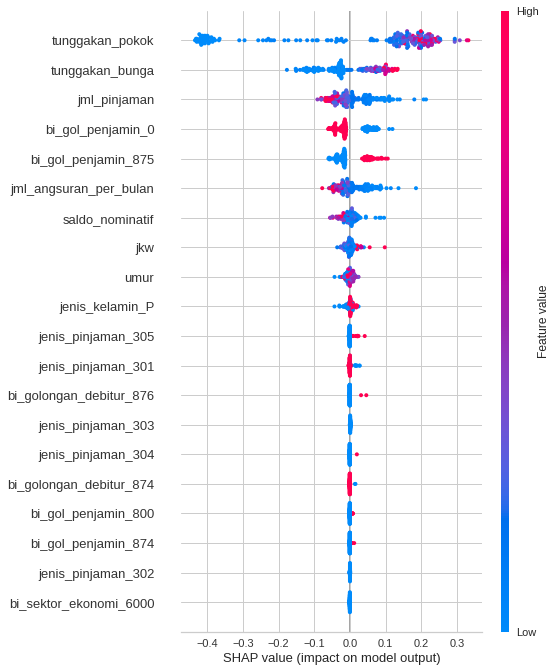

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [61]:
interpret_model(random_forest_model)